In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

2024-07-15 21:40:24.177576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 21:40:24.177748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 21:40:24.355249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
for dirname in os.listdir('/kaggle/input/statefarm'):
    print(dirname)
    #for filename in filenames:
    #    print(os.path.join(dirname, filename))

#datafolder = 
print(os.listdir('/kaggle/input/statefarm'))
#folders = os.listdir(data_folder)

StateFarmDDD
['StateFarmDDD']


In [3]:
# Path to the data folder containing train and test folders

data_folder ='/kaggle/input/statefarm'
# Load the images and labels into lists
images = []
labels = []
folders = os.listdir(data_folder)
class_names = os.listdir(os.path.join(data_folder,folders[-1]))
#class_names.remove('.DS_Store')

print(class_names)

for folder in folders:
    folder_path = os.path.join(data_folder, folder)
    for class_index, class_name in enumerate(class_names):
        class_folder_path = os.path.join(folder_path, class_name)
        print(class_folder_path)
        if class_folder_path.find(".DS") != -1:
          continue
        for filename in os.listdir(class_folder_path):
            if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            #if filename.endswith(('.jepg''.jpg','.png')):
                img = load_img(os.path.join(class_folder_path, filename), target_size=(224, 224))
                img_arr = img_to_array(img)
                images.append(img_arr)
                labels.append(class_index)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=4)

# Scale the pixel values to a range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

['c6_Drinking', 'c0_NotDistracted', 'c1_TextingRightHand', 'c7_ReachingBackSeat', 'c2_CallingRightHand']
/kaggle/input/statefarm/StateFarmDDD/c6_Drinking
/kaggle/input/statefarm/StateFarmDDD/c0_NotDistracted
/kaggle/input/statefarm/StateFarmDDD/c1_TextingRightHand
/kaggle/input/statefarm/StateFarmDDD/c7_ReachingBackSeat
/kaggle/input/statefarm/StateFarmDDD/c2_CallingRightHand


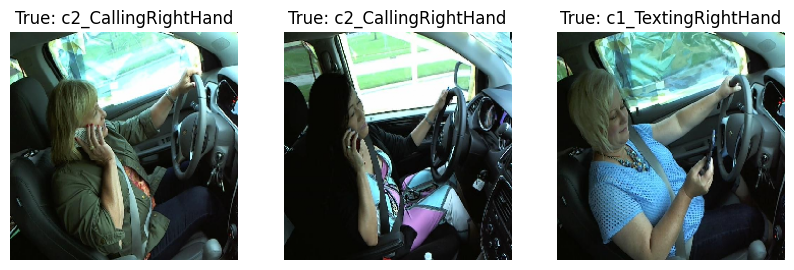

In [4]:
# Display sample images at the beginning
sample_images = X_test[:3]  # Change the number to display more or fewer images
sample_labels = y_test[:3]

plt.figure(figsize=(10, 7))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i].reshape(224, 224, 3))
    plt.title(f'True: {class_names[sample_labels[i]]}')
    plt.axis('off')
plt.show()

In [5]:
#to encode labels into numerics
def convert(array):
  encoded = []
  for i in array:
    column  =[0] * len(class_names)
    column[i] = 1
    encoded.append(column)
  return np.array(encoded)

y_train = convert(y_train)
y_test = convert(y_test)

In [6]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((3409, 224, 224, 3), (3409, 5), (853, 224, 224, 3), (853, 5))

In [7]:
y_train[1]

array([0, 0, 0, 0, 1])

In [8]:
# Build the MLP model
model = Sequential()
inputshape = X_train.shape[1:]
#model.add(Input(shape = X_train.shape[1:],))

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Use softmax activation for multi-class classification

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,915,973 (91.23 MB)

 Trainable params: 23,915,973 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 203s 940ms/step - accuracy: 0.6296 - loss: 1.1885 - val_accuracy: 0.9625 - val_loss: 0.1175
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 207s 962ms/step - accuracy: 0.9835 - loss: 0.0525 - val_accuracy: 0.9930 - val_loss: 0.0357
Epoch 3/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 264s 974ms/step - accuracy: 0.9896 - loss: 0.0265 - val_accuracy: 0.9918 - val_loss: 0.0304
Epoch 4/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 207s 966ms/step - accuracy: 0.9940 - loss: 0.0242 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 5/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 257s 941ms/step - accuracy: 0.9775 - loss: 0.0678 - val_accuracy: 0.9977 - val_loss: 0.0164


In [10]:
# Calculating only Test Set Accuracy of the Model
loss, accuracy = model.evaluate(X_test, y_test)

#print(%.3f"Accuracy : {accuracy}")
print('Accuracy : %.3f' % accuracy)

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis =1)
New_y_test = np.argmax(y_test, axis =1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 403ms/step - accuracy: 0.9982 - loss: 0.0128
Accuracy : 0.998
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 425ms/step


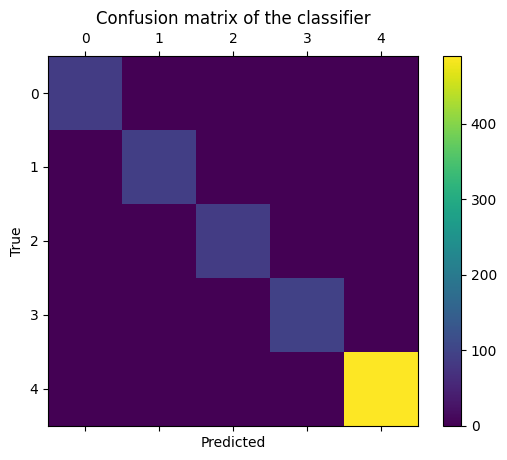

Accuracy :0.9977
0.9956 0.9957 0.9956


In [11]:
"""""""""""""  STEP 4. CALCULATE Model's PERFORMANCE """""""""""""""
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

cm = confusion_matrix(New_y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Accuracy :" + str(round(accuracy_score(New_y_test, y_pred),4)))
p, r, f, s = precision_recall_fscore_support(New_y_test, y_pred, average='macro')
print(round(p,4),round(r,4),round(f,4))

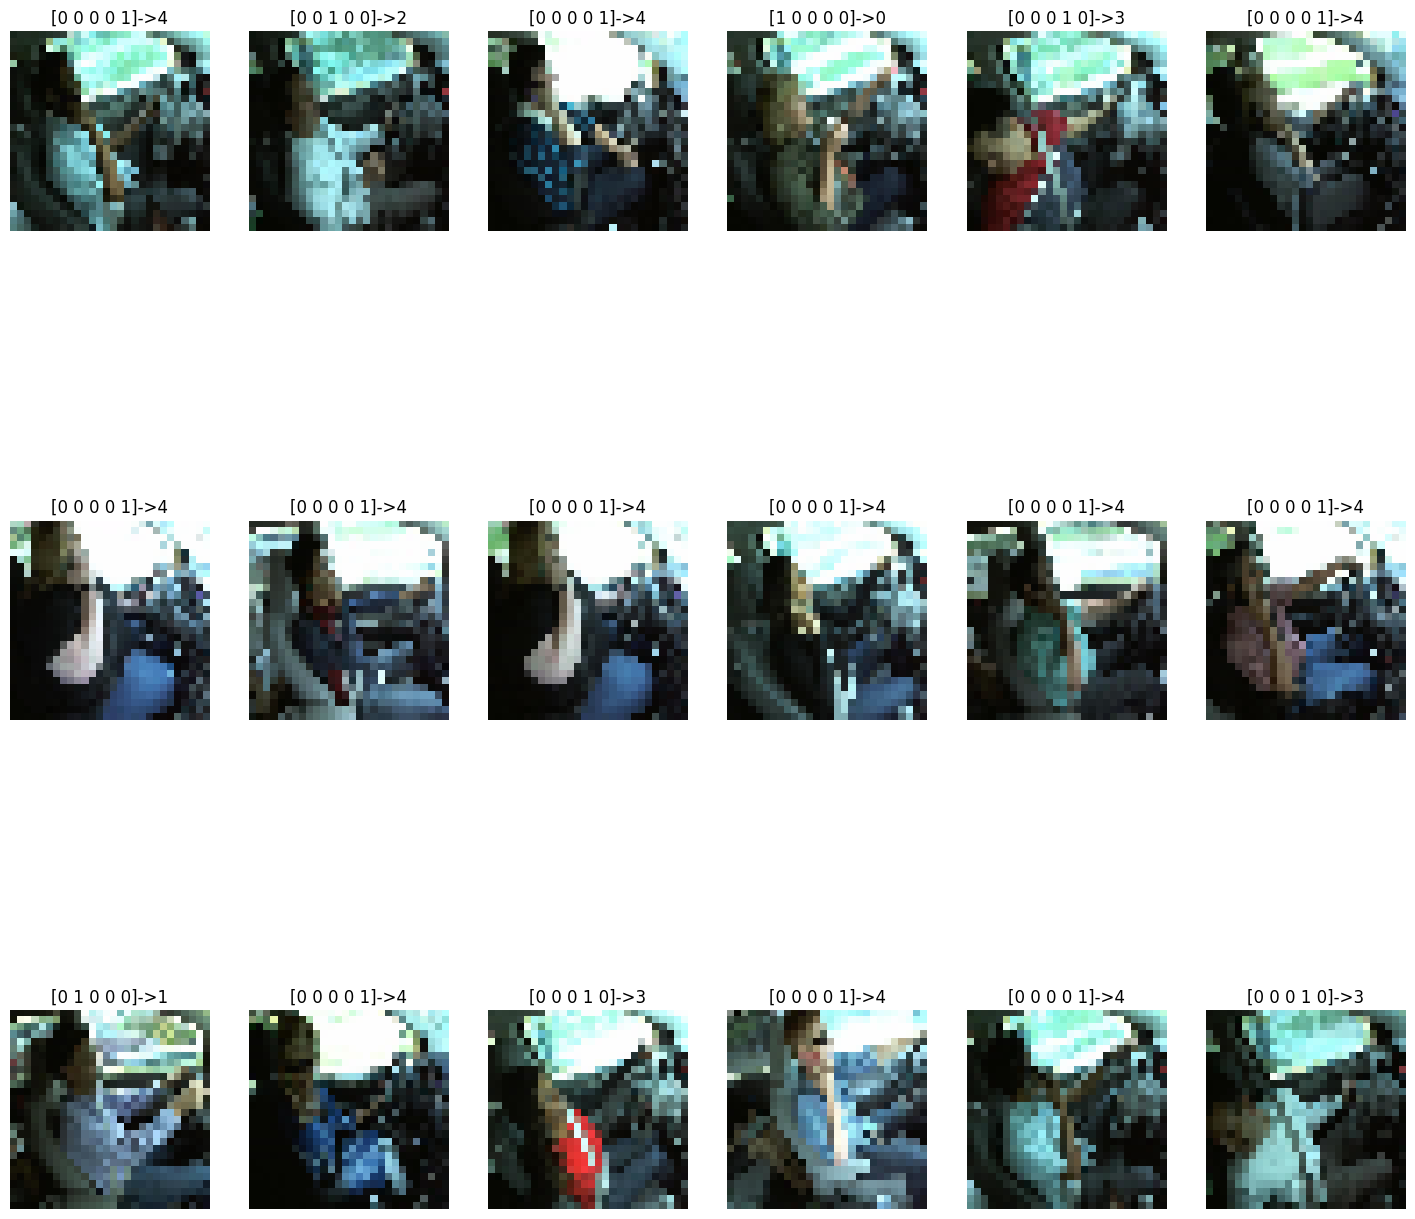

In [12]:
#Visualising the Fire Dataset Samples
import cv2

plt.figure(figsize=(18, 18))
for i in range(18):
  plt.subplot(3, 6, i + 1)
  fignum = np.random.randint(1, high=100)



  plt.imshow(cv2.resize(X_test[fignum], (28, 28)))
  strname = str(y_test[fignum])+"->"+str(y_pred[fignum])
  plt.title(strname)
  plt.axis("off")
  
